In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

####计算从文章中收集到的CD8验证的肽段的亲和力预测得分与免疫原性的关系

In [4]:
def plot_box(filename,aimname):
    df = pd.read_csv(filename,sep="\t",header=0)
    response=df[df['Response']=="CD8+"][aimname]
    noresponse=df[df['Response']=="CD8-"][aimname]  
    maxl=np.max(df[aimname])
    #print(noresponse)
    # 执行秩和检验（Mann-Whitney U 检验）
    statistic, p_value = mannwhitneyu(response, noresponse)
    # 打印结果
    print("Mann-Whitney U 检验结果：")
    print(f"统计量：{statistic}")
    print(f"p 值：{p_value}")

    # 执行 t 检验（独立样本 t 检验）
    statistic, p_value = ttest_ind(response, noresponse)
    # 打印结果
    print("独立样本 t 检验结果：")
    print(f"统计量：{statistic}")
    print(f"p 值：{p_value}")
    
    '''
    grouped_data = df.groupby('Response')['HLA'].apply(list)
    colors = ['red', 'blue']
    #print(grouped_data)
    # 创建一个新的图形，并设置大小
    plt.figure(figsize=(3, 5))

    # 绘制箱线图
    plt.boxplot(grouped_data,widths=0.4)
    # 设置横坐标刻度名称
    plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index)
    '''
    plt.figure(figsize=(3, 4))
    # 按照组别分组
    grouped_data = [df[df['Response'] == 'CD8+'][aimname], df[df['Response'] == 'CD8-'][aimname]]

    # 设置箱线图的颜色
    boxplot = plt.boxplot(grouped_data, widths=0.4, patch_artist=True)

    # 绘制箱线图
    # 设置每个箱体的颜色
    colors = ['#C4372E', '#AAAAAA']
    for box, color in zip(boxplot['boxes'], colors):
        box.set(facecolor=color)
    # 设置x轴标签
    plt.xticks([1, 2], ['CD8+', 'CD8-'])

    # 添加 x 轴标签和标题
    plt.xlabel('Response')
    plt.ylabel(aimname)
    title="Boxplot of "+aimname+" by Response"
    plt.title(title)
    plt.xticks()
    ymax=maxl+maxl*0.2
    plt.ylim(0,ymax)
    pinfor="p-value="+str(round(p_value,6))
    plt.text(1.25, 1,pinfor)
    outplot="Table_"+aimname+"_boxplot.svg"
    outplot=outplot.replace(" ","_")
    plt.savefig(outplot)
    plt.show()

Mann-Whitney U 检验结果：
统计量：2067.0
p 值：2.1801880970530663e-05
独立样本 t 检验结果：
统计量：4.333956980437608
p 值：3.390379003695998e-05


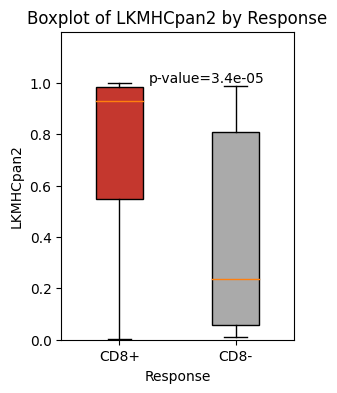

Mann-Whitney U 检验结果：
统计量：591.0
p 值：3.3773752994093035e-07
独立样本 t 检验结果：
统计量：-0.7627579042180275
p 值：0.44733441857839495


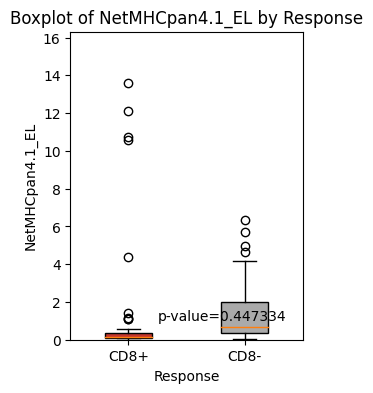

In [5]:
fileinput="Table_Software_binding_ability_106.xls"
plot_box(fileinput,'LKMHCpan2')
plot_box(fileinput,'NetMHCpan4.1_EL')

合并文章+TESLA的免疫原性验证集合

Mann-Whitney U 检验结果：
统计量：52815.5
p 值：2.979433326820954e-14
独立样本 t 检验结果：
统计量：7.37116768724454
p 值：3.9360722482888987e-13


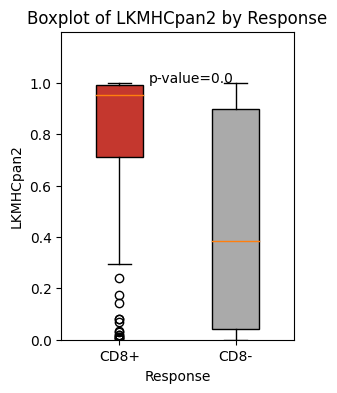

Mann-Whitney U 检验结果：
统计量：18622.5
p 值：1.0235957331808732e-13
独立样本 t 检验结果：
统计量：-2.4826219251888966
p 值：0.013229523423955674


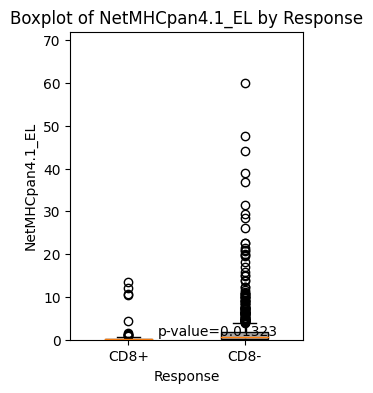

In [6]:
fileinput="Table_Software_binding_ability_all.xls"
plot_box(fileinput,'LKMHCpan2')
plot_box(fileinput,'NetMHCpan4.1_EL')